In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
tmin=-1 # In s
tmax=1 # In s
nx=100000
tphi=np.arange(tmin,tmax,(tmax-tmin)/(nx-1))

time = tphi[1:-1]*1e3

In [3]:
tmin=-3 # In s
tmax=3 # In s
nx=500000
tphi=np.arange(tmin,tmax,(tmax-tmin)/(nx-1))

timeB = tphi[1:-1]*1e3

In [4]:
i = 0

a = np.load('signals/maff/signals_'+str(i)+'.npy')[0]
b = np.load('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/0/maff/0/signals_'+str(i)+'.npy')[0]
c = np.load('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic-test/0/maff/0/signals_'+str(i)+'.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'signals/maff/signals_0.npy'

In [ ]:
c.shape

In [ ]:
plt.figure()
plt.plot(timeB,a)
# plt.plot(timeB,b)
# plt.plot(timeB,c[-1])

In [5]:
total = 0
for i in range(39):

    try:
        total += np.load('signals/maff/signals_'+str(i)+'.npy')
        total += np.load('signals/meff/signals_'+str(i)+'.npy')
        total += np.load('signals/uaff/signals_'+str(i)+'.npy')
        total += np.load('signals/ueff/signals_'+str(i)+'.npy')

    except:
        pass

In [6]:
total.shape

AttributeError: 'int' object has no attribute 'shape'

In [7]:
from scipy.io import loadmat
rawData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')
a500 = list(rawData['eCAPSdata_220328'][0][-5])

rawSignal = a500[1][-1]-a500[1][0]
rawTime = a500[2][0]

In [8]:
timeLimits = np.intersect1d( np.where(rawTime < 9 )[0], np.where(rawTime>1)[0] )

rawTime = rawTime[timeLimits]
rawSignal = rawSignal[timeLimits]

In [9]:
indices = []
for t in rawTime:
    indices.append(np.argmin(np.abs(timeB-t)))

signal = total[0,indices]



TypeError: 'int' object is not subscriptable

In [ ]:
plt.figure()
plt.plot(rawTime,signal)
plt.plot(rawTime,rawSignal)
# plt.xlim([1,8])
plt.xlabel('Time (ms)')
plt.ylabel('eCAP Amplitude (normalized)')
plt.legend(['Model','In vivo'])
plt.show()

In [13]:
from math import gamma
def gammaDist(x,k,theta):
    
    return 1 / (gamma(k)*theta**k) * x**(k-1)*np.exp(-x/theta)

In [14]:
def getDiameters(iteration):
    
   
    minDiam = .1
    
    
    maxDiam = 10 #7 + 5*iteration/30 
    
    d = np.linspace(minDiam,maxDiam,1000)*1e-6

    return d

In [15]:
d = getDiameters(0)

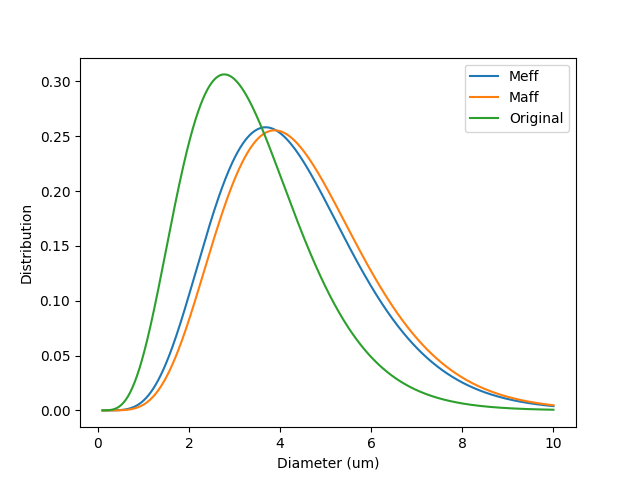

In [16]:
plt.figure()

startParams = [5.7,0.59]
meffParams = [6.8386824884e+0,6.3037604511e-01]
maffParams = [7.3297993806e+0, 6.1266828638e-01]

plt.plot(d*1e6,gammaDist(d*1e6,meffParams[0],meffParams[1]))
plt.plot(d*1e6,gammaDist(d*1e6,maffParams[0],maffParams[1]))
plt.plot(d*1e6,gammaDist(d*1e6,startParams[0],startParams[1]))

plt.legend(['Meff','Maff','Original'])
plt.xlabel('Diameter (um)')
plt.ylabel('Distribution')
plt.show()